In [2]:
# %load_ext autoreload
# %autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import root_aux as raux

In [3]:
simfile = "./simline320_270_76fib_8lay_n1e7_nowallpetCUT93_mask467_210mm_20thick_0_0_50_3.root"
simfile2 = "./simline320_270_76fib_8lay_n1e8_nowallpetCUT93_mask467_210mm_20thick_0_0_50_3.root"
# simfile = "./simteset.root"
simdata, source = raux.get_histo(simfile, ["energyDeposits", "sourceHist"])
source_row = source.vals.reshape(-1)
sim_vals_row = simdata.vals.reshape(-1)
simdata2, source2 = raux.get_histo(simfile2, ["energyDeposits", "sourceHist"])
sim_vals_row2 = simdata2.vals.reshape(-1)

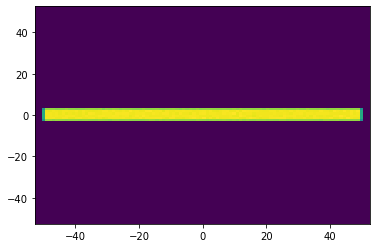

In [4]:
plt.pcolor(source.edges.x, source.edges.y, source.vals.T)

In [5]:
matrixH =  raux.get_hmat("./matr320_270_76fib_8lay_n1e6_nowallpetCUT93_mask467_210mm_20thick_s105_100.root")
# matrixH2 =  raux.get_hmat("../../build/matr320_270_76fib_n0p5e6_nowallpetCUT93_mask467_210mm_20thick_s105_100.root", norm=False)
# matrixH = matrixH + matrixH2
# matrixH = matrixH/matrixH.sum(axis=0)

In [6]:
imagebig = raux.reco_mlem(matrixH, sim_vals_row, 800)
imagesmall = raux.reco_mlem(matrixH, sim_vals_row2, 800)

Reconstruction:  14%|███████████                                                                      | 109/800 [00:06<00:44, 15.60it/s]


KeyboardInterrupt: 

In [7]:
imagebig = raux.reco_mlem_auto(matrixH, sim_vals_row, source_row)
imagesmall = raux.reco_mlem_auto(matrixH, sim_vals_row2, source_row)

Reconstruction(autoiter):   0%|                                                                        | 2/2000 [00:00<02:11, 15.16it/s]

474 iterations was performed
Best score: 0.07369


Reconstruction(autoiter):  60%|█████████████████████████████████████████▍                           | 1200/2000 [01:13<00:48, 16.36it/s]

1199 iterations was performed
Best score: 0.04104


In [8]:
mse, uqi, comb = raux.mse_uqi_set(imagebig, source_row)

In [9]:
msesmall, uqismall, combsmall = raux.mse_uqi_set(imagesmall, source_row)

In [128]:
np.argmin(msesmall)

197

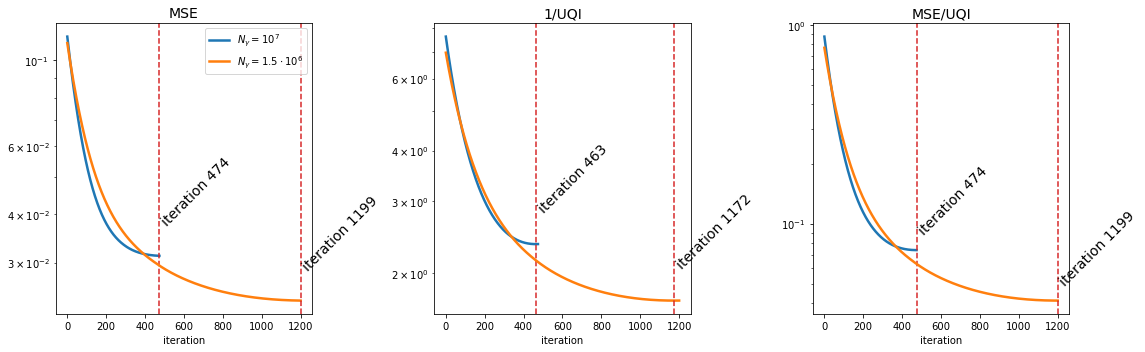

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(range(1,len(mse)), mse[1:], lw=2.5, label="$N_\gamma = 10^7$")
plt.axvline(x=np.argmin(mse), c="tab:red", ls="--")
plt.text(np.argmin(mse),1.2*mse[np.argmin(mse)],f'iteration {np.argmin(mse)}',rotation=45, size=14)
###
plt.plot(range(1,len(msesmall)), msesmall[1:], lw=2.5, label="$N_\gamma=1.5 \cdot 10^6$")
plt.axvline(x=np.argmin(msesmall), c="tab:red", ls="--")
plt.text(np.argmin(msesmall),1.2*msesmall[np.argmin(msesmall)],f'iteration {np.argmin(msesmall)}',rotation=45, size=14)
plt.legend()
###
plt.yscale('log')
plt.xlabel("iteration")
plt.title("MSE", size=14)
plt.subplot(132)
plt.plot(range(1,len(mse)), uqi[1:], lw=2.5)
plt.axvline(x=np.argmin(uqi), c="tab:red", ls="--")
plt.text(np.argmin(uqi),1.2*uqi[np.argmin(uqi)],f'iteration {np.argmin(uqi)}',rotation=45, size=14)
###
plt.plot(range(1,len(msesmall)), uqismall[1:], lw=2.5)
plt.axvline(x=np.argmin(uqismall), c="tab:red", ls="--")
plt.text(np.argmin(uqismall),1.2*uqismall[np.argmin(uqismall)],f'iteration {np.argmin(uqismall)}',rotation=45, size=14)
###
plt.title("1/UQI", size=14)
# plt.ylim([1,2])
plt.yscale('log')
plt.xlabel("iteration")
plt.subplot(133)
plt.plot(range(1,len(mse)), comb[1:], lw=2.5)
plt.axvline(x=np.argmin(comb), c="tab:red", ls="--")
plt.text(np.argmin(comb),1.2*comb[np.argmin(comb)],f'iteration {np.argmin(comb)}',rotation=45, size=14)
###
plt.plot(range(1,len(msesmall)), combsmall[1:], lw=2.5)
plt.axvline(x=np.argmin(combsmall), c="tab:red", ls="--")
plt.text(np.argmin(combsmall),1.2*combsmall[np.argmin(combsmall)],f'iteration {np.argmin(combsmall)}',rotation=45, size=14)
###
plt.title("MSE/UQI", size=14)
plt.yscale('log')
plt.xlabel("iteration")
plt.tight_layout()
plt.savefig("uqi_simline320_270_76fib_8lay_nowallpetCUT93_mask467_210mm_20thick_0_0_30_3_Ngammacomparison.pdf", facecolor="white")
plt.show()

In [11]:
reco_row = imagebig[-1]
reco = reco_row.reshape(100,100)[:,::-1].T/reco_row.sum()

In [57]:
# x = np.linspace(0,105,100)-105/2

In [12]:
reco_row2 = imagesmall[-1]
reco2 = reco_row2.reshape(100,100)[:,::-1].T/reco_row2.sum()

In [13]:
binWidth = 0.5*(source.edges.x[1]-source.edges.x[0])

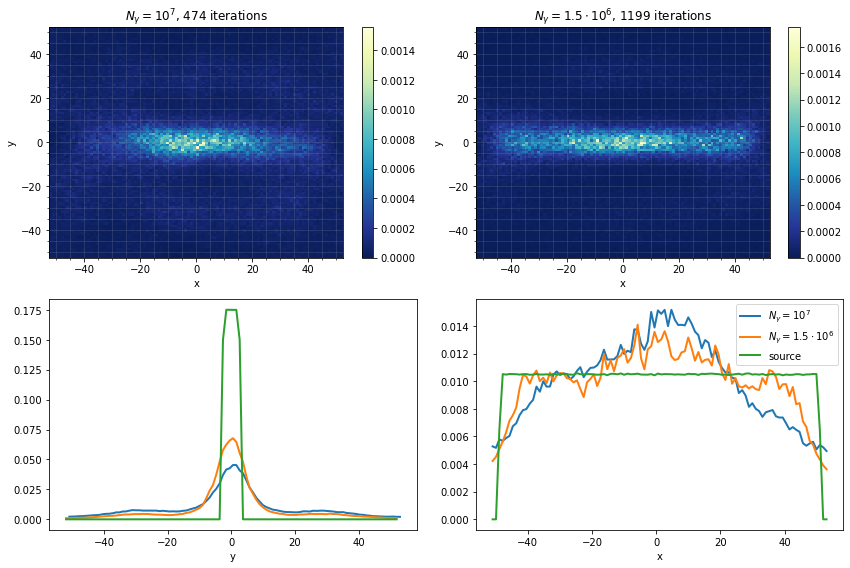

In [14]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.pcolor(source.edges.x, source.edges.y, reco, cmap="YlGnBu_r", rasterized=True)
plt.xlabel("x")
plt.ylabel("y")
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
plt.title(f"$N_\gamma = 10^7$, {len(imagebig)-1} iterations")
plt.colorbar()
plt.subplot(222)
plt.pcolor(source.edges.x, source.edges.y, reco2, cmap="YlGnBu_r", rasterized=True)
plt.xlabel("x")
plt.ylabel("y")
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
plt.title(f"$N_\gamma = 1.5 \cdot 10^6$, {len(imagesmall)-1} iterations")
plt.colorbar()
plt.subplot(223)
plt.plot(source.edges.y[:-1] + binWidth, reco.sum(axis=1), label="$N_\gamma = 10^7$", lw=2)
plt.plot(source.edges.x[:-1] + binWidth, reco2.sum(axis=1), label="$N_\gamma = 1.5 \cdot 10^6$", lw=2)
plt.plot(source.edges.x[:-1] + binWidth, source.vals.T.sum(axis=1)/source.vals.T.sum(), label="source", lw=2)
plt.xlabel("y")
# plt.legend()
plt.subplot(224)
plt.plot(source.edges.y[:-1] + binWidth, reco.sum(axis=0), label="$N_\gamma = 10^7$", lw=2)
plt.plot(source.edges.y[:-1] + binWidth, reco2.sum(axis=0), label="$N_\gamma = 1.5 \cdot 10^6$", lw=2)
plt.plot(source.edges.y[:-1] + binWidth, source.vals.T.sum(axis=0)/source.vals.T.sum(), label="source", lw=2)
plt.xlabel("x")
plt.legend()
plt.tight_layout()
plt.savefig("histo_simline320_270_76fib_8lay_nowallpetCUT93_mask467_210mm_20thick_0_0_30_3_Ngammacomparison.pdf", facecolor="white")
plt.show()

In [59]:
from scipy.optimize import curve_fit
from scipy.stats import norm

In [71]:
def Gauss(x, A, loc, scale):
    y = A * norm.pdf(x, loc=loc, scale=scale)
    return y

In [86]:
parameters, covariance = curve_fit(Gauss, source.edges[:-1] + binWidth, reco2.sum(axis=0)/reco2.sum())

In [87]:
parameters

array([0.82773446, 0.16269994, 4.38757982])

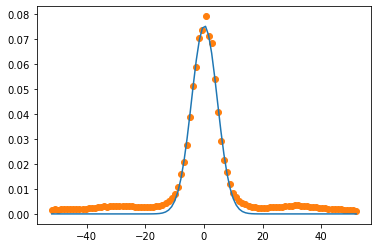

In [88]:
plt.plot(source.edges[:-1] + binWidth, Gauss(source.edges[:-1] + binWidth, *parameters))
plt.scatter(source.edges[:-1] + binWidth, reco2.sum(axis=0)/reco2.sum(), color="tab:orange")
plt.show()

In [46]:
source_row_norm = raux.normalize(source_row)

In [49]:
raux.mse_uqi(image[-1], source_row_norm, normx=True, normy=False)

(0.1328778910795997, 0.4311849500362268)

In [22]:
raux.uqi(raux.normalize(image[-1]), raux.normalize(source_row))

0.23340943907026512

In [15]:
import scipy as sp
import scipy.ndimage

In [208]:
reco2 = sp.ndimage.filters.gaussian_filter(reco, [0.9, 0.9], mode='constant')

In [199]:
# source_row += 1
source_row = a.flatten()

In [301]:
a = np.zeros((100,100))

In [84]:
np.sqrt(((source_vals/source_vals.sum()-reco/reco.sum())**2).sum())

0.04487400466080674

In [178]:
mse, Q = uqi(image[1:], source_row)

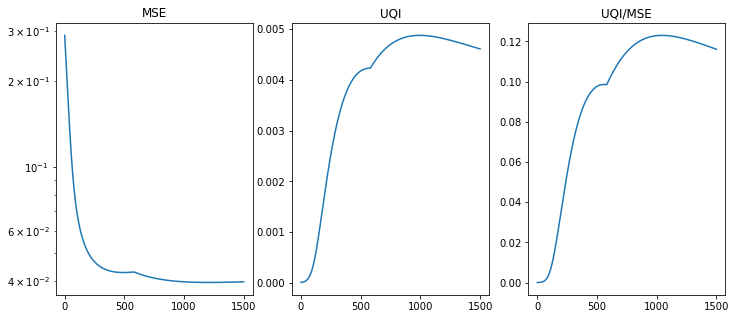

In [184]:
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.plot(mse)
plt.yscale("log")
plt.title("MSE")
plt.subplot(132)
plt.plot(Q)
plt.title("UQI")
plt.subplot(133)
plt.plot(Q/mse)
plt.title("UQI/MSE")
plt.show()

In [180]:
print(np.argmin(mse), np.argmax(Q), np.argmax(Q/mse), int(np.mean([np.argmin(mse), np.argmax(Q), np.argmax(Q/mse)])))

1206 994 1045 1081


In [95]:
reco_row.var()

6437.025303326431

In [101]:
cov

array([[6.43766907e+03, 1.33384538e+06],
       [1.33384538e+06, 5.43156134e+08]])

In [100]:
cov = np.cov(reco_row, source_row)

In [103]:
Q = 4*reco_row.mean()*source_row.mean()*np.sqrt(cov[0,1])/(cov[0,0]+cov[1,1])/(reco_row.mean()**2 + source_row.mean()**2)
Q

4.795304876321361e-08

In [90]:
import pickle

In [91]:
with open("histo.pkl", "rb") as f:
    simdata1e8 = pickle.load(f)

In [94]:
image_n = raux.reco(matrixH, simdata1e8[0].vals.reshape(-1), 500)

Reconstruction: 100%|██████████| 500/500 [00:42<00:00, 11.87it/s]


In [136]:
reco_rown = image_n[-1]
recon = reco_rown.reshape(100,100)[:,::-1]/reco_rown.max()

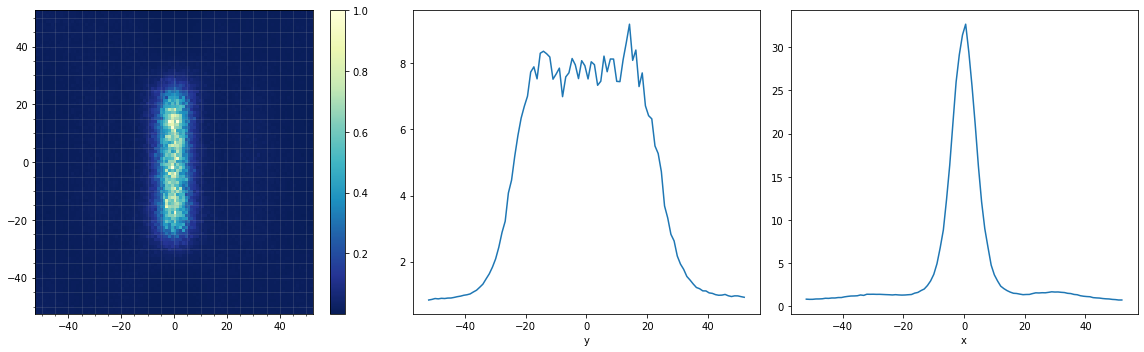

In [140]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.pcolor(source.edges, source.edges, recon, cmap="YlGnBu_r", rasterized=True)
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
# plt.imshow(recon, cmap="jet")
plt.colorbar()
plt.subplot(132)
plt.plot(source.edges[:-1] + binWidth, recon.sum(axis=1), label="small")
plt.xlabel("y")
# plt.legend()
plt.subplot(133)
plt.plot(source.edges[:-1] + binWidth, recon.sum(axis=0), label="small")
plt.xlabel("x")
# plt.legend()
plt.tight_layout()
plt.savefig("histo_n1e8_500iter.pdf", facecolor="white")
plt.show()

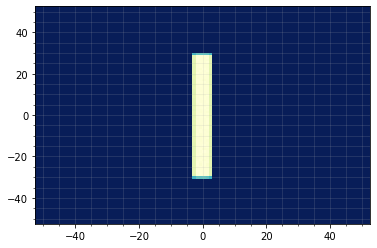

In [129]:
plt.pcolor(source.edges, source.edges, source.vals, cmap="YlGnBu_r", rasterized=True)
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
plt.savefig("linesource.pdf", facecolor="white")
plt.show()

In [134]:
reco2 = reco2/reco2.max()

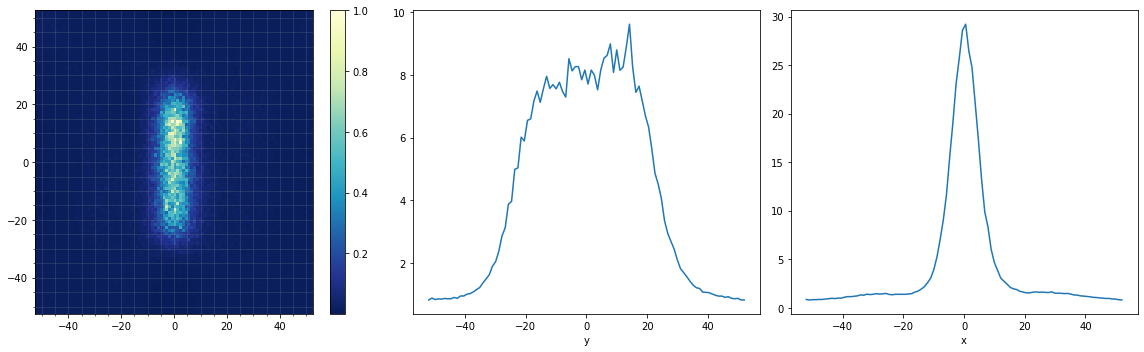

In [177]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.pcolor(source.edges, source.edges, reco, cmap="YlGnBu_r", rasterized=True)
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
# plt.imshow(reco, cmap="jet")
plt.colorbar()
plt.subplot(132)
plt.plot(source.edges[:-1] + binWidth, reco.sum(axis=1), label="small")
plt.xlabel("y")
plt.subplot(133)
plt.plot(source.edges[:-1] + binWidth, reco.sum(axis=0), label="small")
plt.xlabel("x")
# plt.plot(source.edges[:-1] + binWidth, reco2.sum(axis=0), label="big")
# plt.legend()
plt.tight_layout()
plt.savefig("histo_1e7_500iter_8lay.pdf", facecolor="white")
plt.show()

In [173]:
mse_arr = []
uqi_arr = []
b_arr = []
for i in range(1,1000):
    mse, uqi, b = raux.mse_uqi(image[i].reshape(100,100), source.vals)
    mse_arr.append(mse)
    uqi_arr.append(1/uqi)
    b_arr.append(b)
print(mse, 1/uqi, b)

0.12566591115972764 0.5082412639028085 0.24725641163949028


In [175]:
print(np.argmin(mse_arr), np.argmax(uqi_arr), np.argmin(b_arr))

520 382 400
